## 회전(Rotation)

In [1]:
# 회전
import cv2
import matplotlib.pyplot as plt

In [2]:
# image read
image = cv2.imread("./0_cat.png")
# image BGR -> RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# 회전할 각도 설정
angle = 30

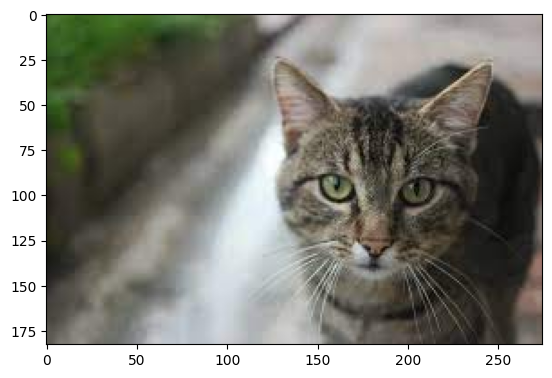

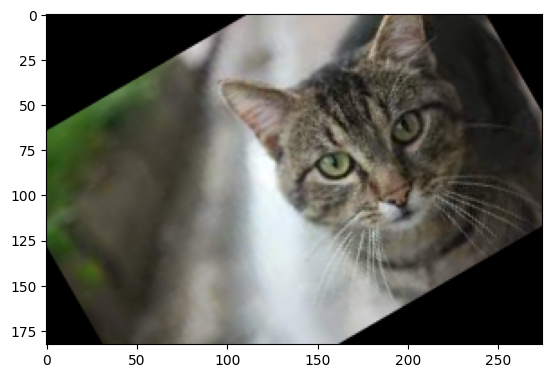

In [4]:
# 이미지 중심점 기준 회전 행렬 생성
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# 회전 적용
rotated = cv2.warpAffine(image, M, (w, h))

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# rotated 적용한 이미지
plt.imshow(rotated)
plt.show()

## 이동(shift)

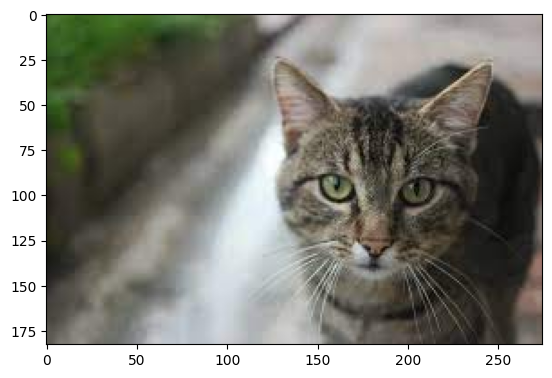

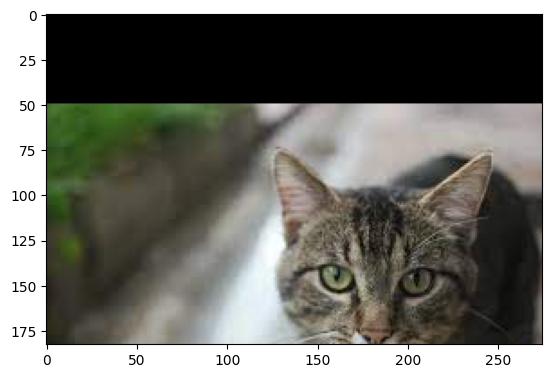

In [5]:
import numpy as np

# 이미지 이동할 거리 설정 (x, y)
shift = (0, 50)

# 변환 행렬 생성
M = np.float32([[1, 0, shift[0]], [0, 1, shift[1]]])

# 이동 변환 적용
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# 이동 변환 적용한 이미지
plt.imshow(shifted)
plt.show()

## 확대/축소 (Zoom)

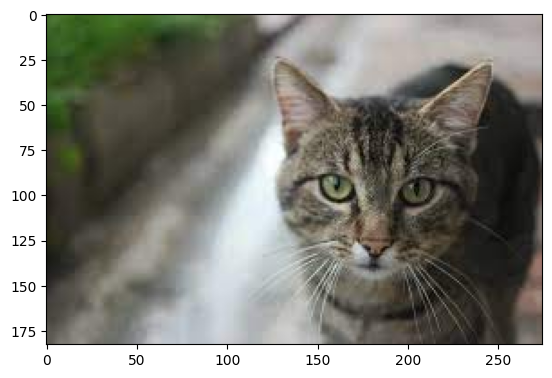

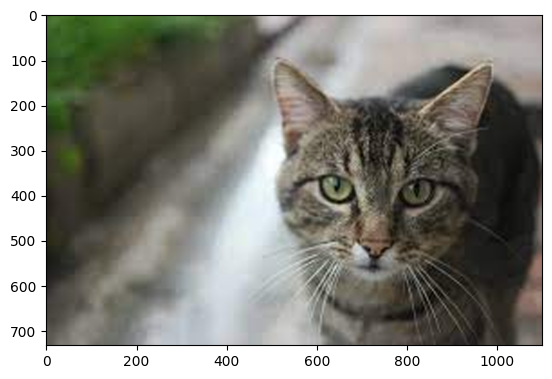

In [6]:
# image read
image = cv2.imread("./0_cat.png")
# image BGR -> RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지 크기 설정
height, width = image.shape[:2]

# 확대/축소할 배율 설정
zoom_scale = 4

# 이미지 확대/축소
zoomed = cv2.resize(image, (width*zoom_scale, height*zoom_scale), interpolation=cv2.INTER_CUBIC)

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# 이미지 확대 축소 적용한 이미지
plt.imshow(zoomed)
plt.show()

## 반전(Flip)

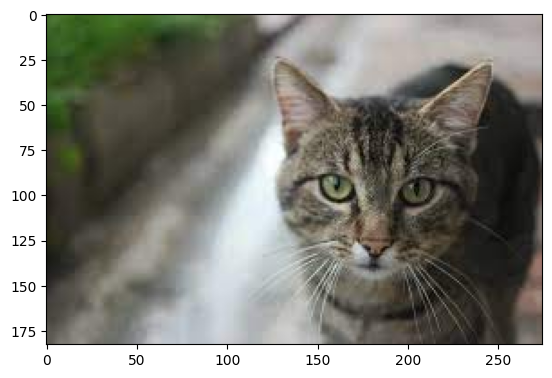

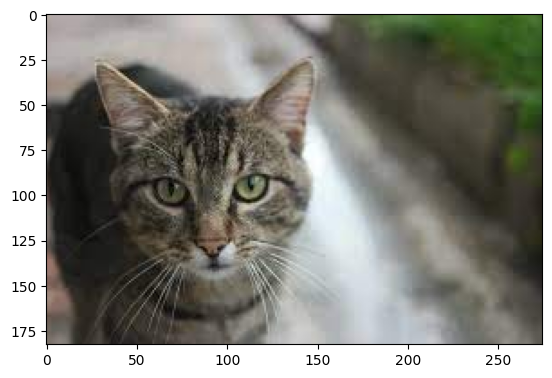

In [7]:
# 이미지 좌우 반전
# 1 좌우
# 0 상하
flipped = cv2.flip(image, 1)

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# 이미지 반전
plt.imshow(flipped)
plt.show()

## 노이즈 추가 (Noise addition)
Salt-and-Pepper Noise

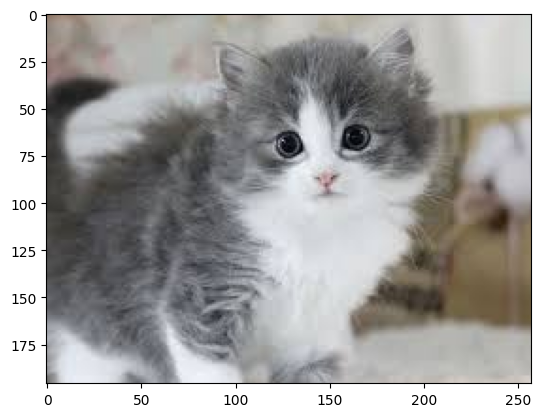

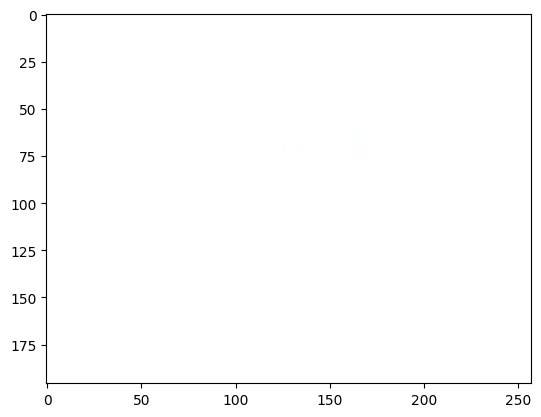

In [8]:
# image read
image = cv2.imread("./cat/33_cat.png")
# image BGR -> RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Salt-and-Pepper Noise 추가
noise = np.zeros(image.shape, np.uint8)
cv2.randu(noise, 0, 255)
black = noise < 30
white = noise < 225
noise[black] = 0
noise[white] = 255

# 각 채널별로 노이즈 추가
noise_b = noise[:, :, 0]
noise_g = noise[:, :, 1]
noise_r = noise[:, :, 2]
noise_img = cv2.merge([cv2.add(image[:, :, 0], noise_b),
                      cv2.add(image[:, :, 1], noise_g),
                      cv2.add(image[:, :, 2], noise_r)])

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# Noise 추가된 이미지 출력
plt.imshow(noise_img)
plt.show()

#### Gaussian Noise
영상의 밝기 값을 정규 분포를 따르는 확률 분포에서 무작위로 선택하여 생성되는 노이즈


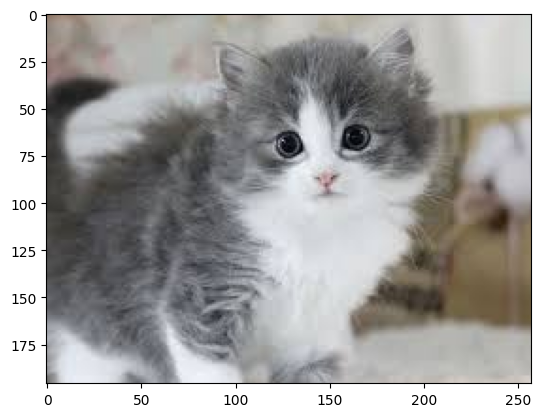

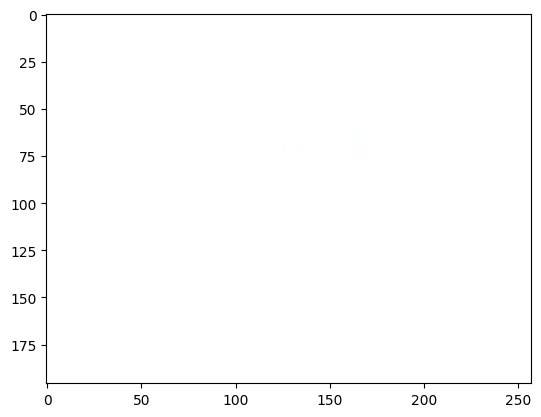

In [9]:
# Gaussian Noise 추가
mean = 0
var = 100
sigma = var ** 0.5
gauss = np.random.normal(mean, sigma, image.shape)
gauss = gauss.reshape(image.shape).astype('uint8')
noisy_img = cv2.add(image, gauss)

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# Noise 추가된 이미지 출력
plt.imshow(noise_img)
plt.show()

## 색조(Hue)

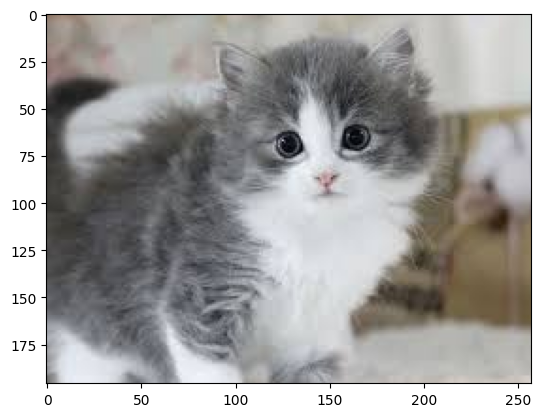

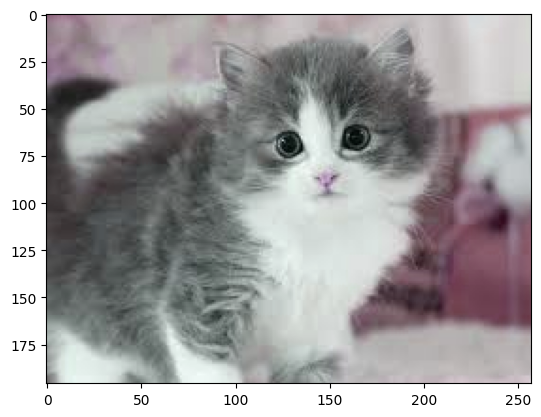

In [10]:
# BGR 색공간에서 HSV 색공간으로 변한
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 색조(Hue) 값 변경
hue_shift = 30 # 시계방향으로 30도 색조 변경
hsv_img[..., 0] = (hsv_img[..., 0] + hue_shift) % 180

# HSV 색공간에서 BGR 색공간으로 변환
bgr_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# 색조 변환 이미지 출력
plt.imshow(bgr_img)
plt.show()

## 색조 이동(Color shifting)

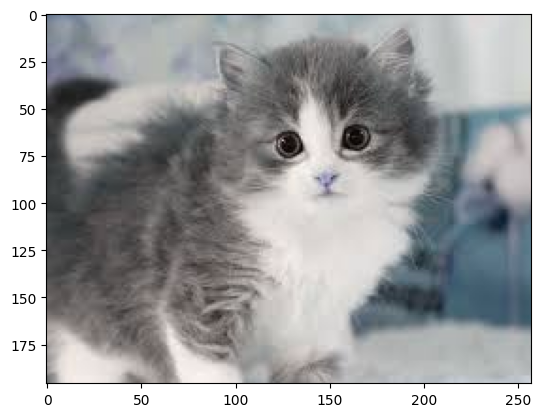

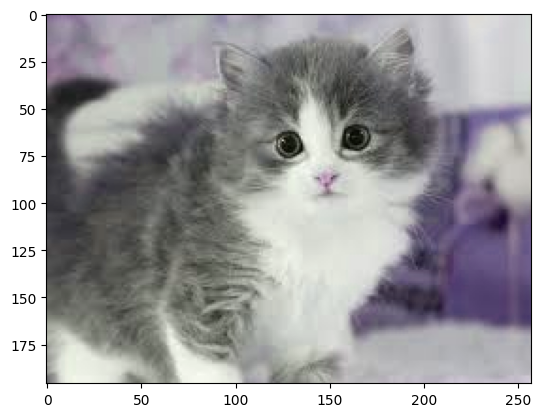

In [11]:
# BGR 색공간에서 HSV 색공간으로 변한
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 색조 이동 (예: 30도 시계방향으로 이동)
hue_shift = 30
hsv_img[..., 0] = (hsv_img[..., 0] + hue_shift) % 180

# BGR -> RGB
brg_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
# 원본 이미지 BGR -> RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# 색조 변환 이미지 출력
plt.imshow(brg_img)
plt.show()

## 색상 변환 (Color transformation)

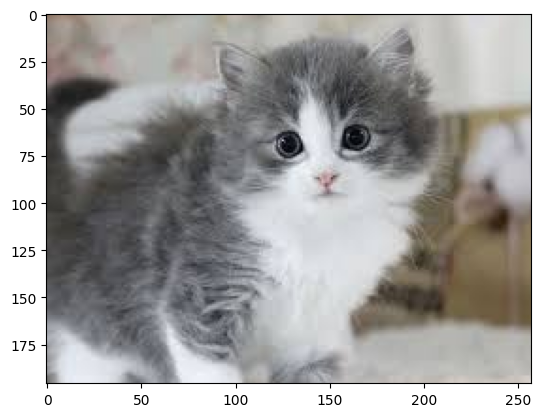

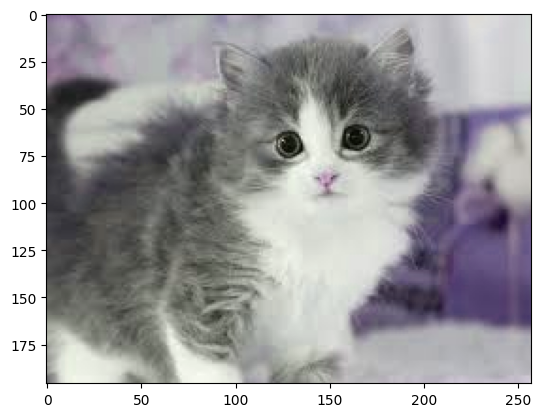

In [15]:
# BGR 색공간에서 HSV 색공간으로 변한
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSV 이미지에서 각 채널의 값을 변경하여 색상 변환 수행
hsv_img[..., 0] += 50 # 색조 채널(Hue) 조정
hsv_img[..., 1] = np.uint8(np.float32(hsv_img[..., 1]) * 0.5)   # 채도 채널(Saturation) 조정
hsv_img[..., 2] = np.uint8(np.float32(hsv_img[..., 2]) * 1.5)   # 밝기 채널(Value) 조정

"""
OpenCV의 cv2.cvtColor() 함수를 사용하여 이미지를 HSV 색공간으로 변환하면,
채도와 밝기 값은 0부터 255 사이의 정수형(uint8)으로 구성된 배열로 표현됨
따라서 0.5와 같은 실수형(flaot)값을 곱하면, 결과가 실수형이 되어 다시 uint8 형식으로 변환할 수 없다.
그래서 numpy 이용해서 형변환
"""

# HSV 색공간에서 BGR 색공간으로 변환
bgr_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

# BRG -> RGB
bgr_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 원본 이미지 BGR -> RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# 색조 변환 이미지 출력
plt.imshow(brg_img)
plt.show()

## 이미지에서 일부 영역 잘라내기

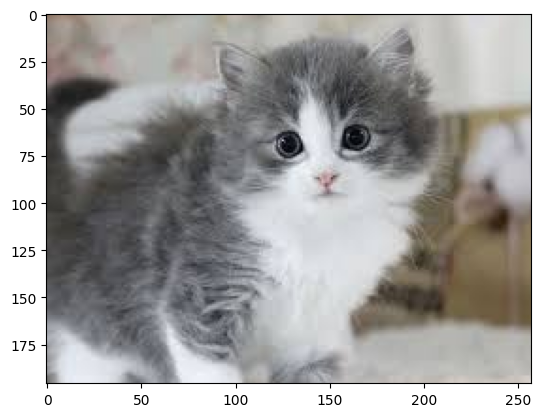

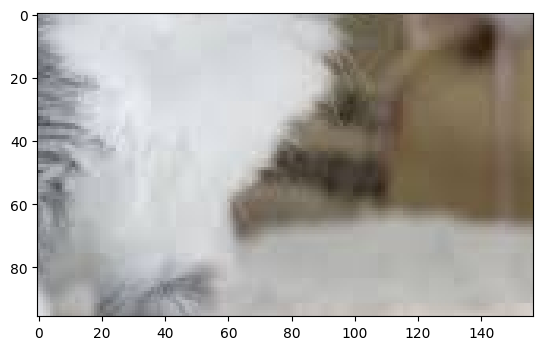

In [16]:
# 잘라낼 영역의 좌표와 크기 설정
x, y, w, h = 100, 100, 200, 200

# 영역 잘라내기
crop_img = image[y:y+h, x:x+w]

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# 이미지 자르기
plt.imshow(crop_img)
plt.show()

## 이미지 변형(cv2.warpAffine())

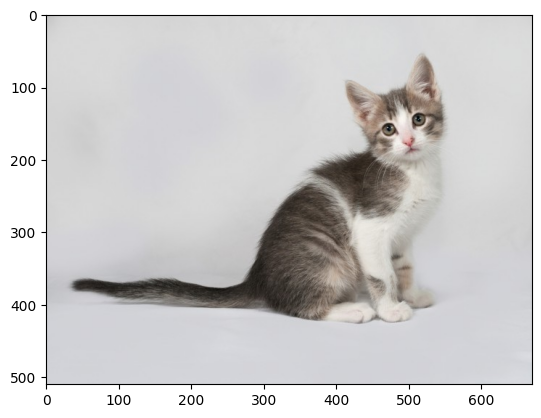

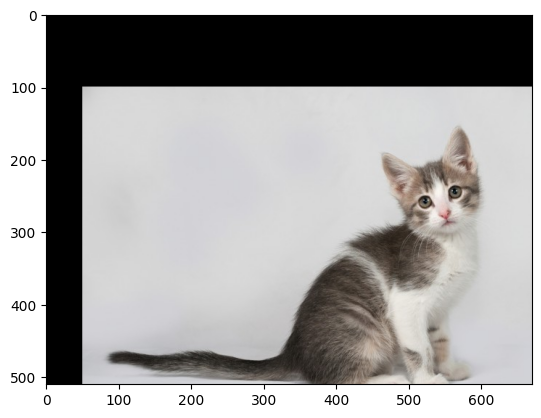

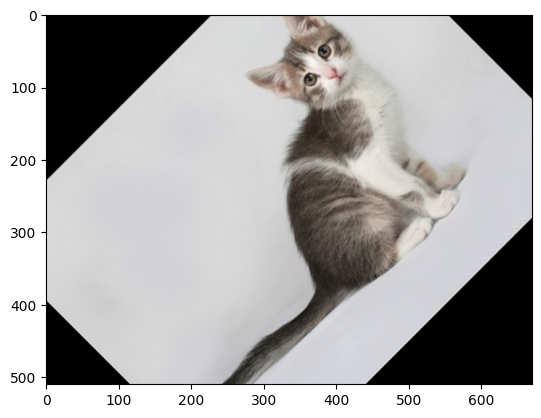

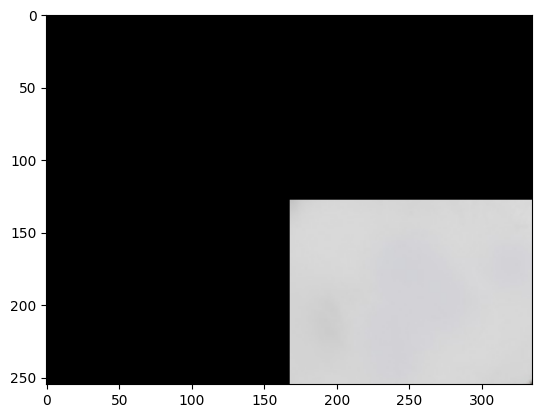

In [24]:
# 이미지로드
image = cv2.imread('./cat02/4_cat.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지 이동
M = np.float32([[1,0,50],[0,1,100]])   # x축으로 50, y축으로 100 이동
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# 이미지 회전
M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), 45, 1)
rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# 이미지 확대/축소
M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), 0, 0.5)   # 0.5배 크기로 축소
resized = cv2.warpAffine(image, M, (int(image.shape[1] * 0.5), int(image.shape[0] * 0.5)))

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# 이미지 이동
plt.imshow(shifted)
plt.show()

# 이미지 회전
plt.imshow(rotated)
plt.show()

# 이미지 확대/축소
plt.imshow(resized)
plt.show()

## 블러링(blurring)

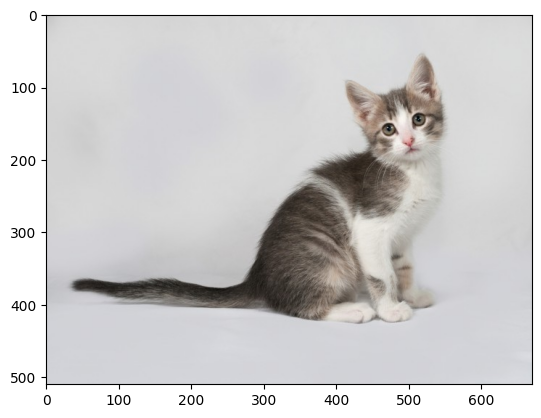

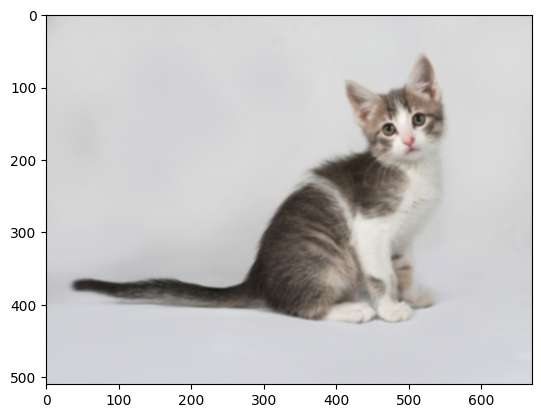

In [25]:
# 가우시안 블러링 적용
blur = cv2.GaussianBlur(image, (5, 5), 0)

# 원본 이미지 보기
plt.imshow(image)
plt.show()

# 이미지 블러링 적용
plt.imshow(blur)
plt.show()

## 적응형 임계값(Adaptive thresholding)

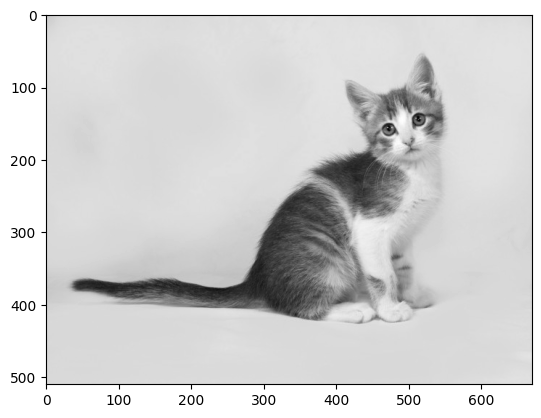

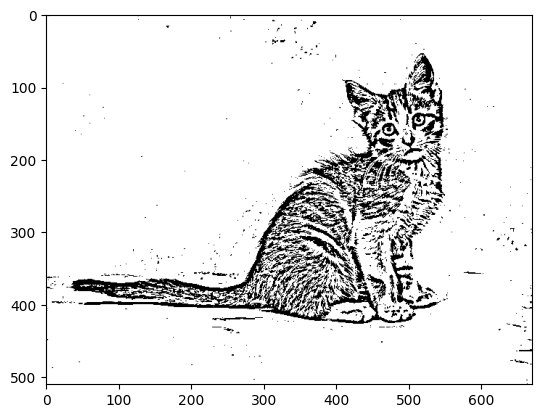

In [28]:
# 이미지 로드
img = cv2.imread('./cat02/4_cat.png', 0)

# 적응형 임계값 처리
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# 원본 이미지 보기
plt.imshow(img, 'gray')
plt.show()

plt.imshow(thresh, 'gray')
plt.show()

## 색상 보정(Color correction)

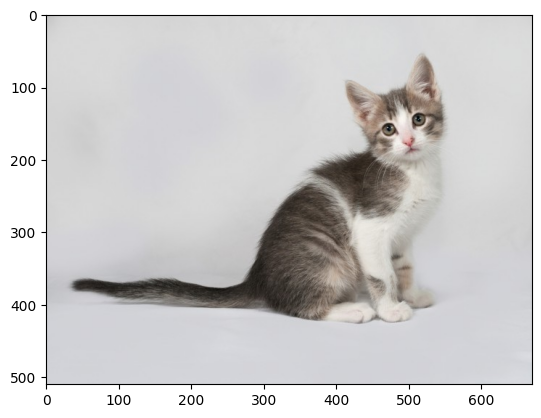

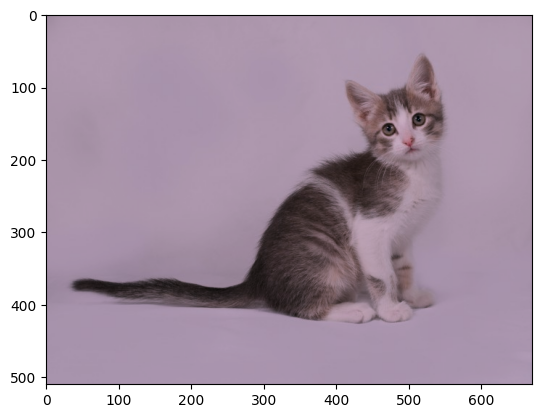

In [31]:
img = cv2.imread('./cat02/4_cat.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

org_img = img.copy()

# 색상 보정
balance = [0.8, 0.7, 0.8]   # BGR 각 채널에 대한 보정값 (1.0은 보정하지 않음)

for i in range(3):
    if balance[i] != 1.0:
        img[..., i] = cv2.addWeighted(img[..., i], balance[i], 0, 0, 0)
        
# 원본 이미지 보기
plt.imshow(org_img)
plt.show()

# 색보정 이미지
plt.imshow(img)
plt.show()

## 모션 블러(Motion blur)

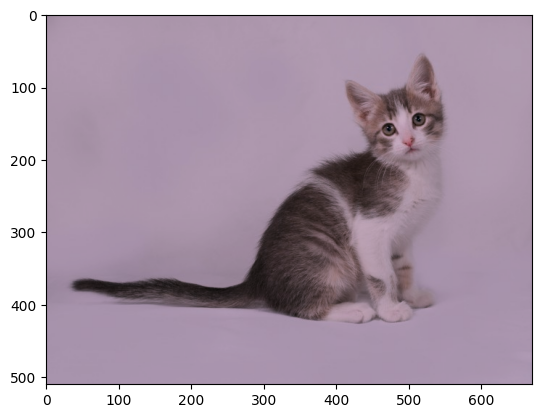

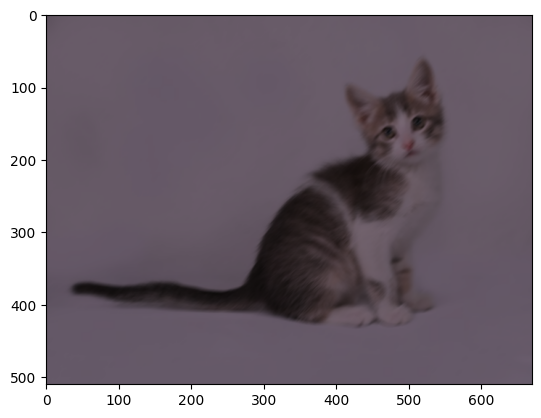

In [34]:
# 모션 블러 커널 생성
kernel_size = 15
kernel_direction = np.zeros((kernel_size, kernel_size))
kernel_direction[int((kernel_size-1)/2), :] = np.ones(kernel_size)
kernel_direction /= kernel_size  # 커널 합이 1이 되도록 정규화
kernel_matrix = cv2.getRotationMatrix2D((kernel_size/2, kernel_size/2), 45, 1)
kernel = np.hstack((kernel_matrix[:, :2], [[0], [0]]))   # 회전 매트릭스와 오프셋 벡터 결합하여 2x3 매트릭스 생성
kernel = cv2.warpAffine(kernel_direction, kernel, (kernel_size, kernel_size))

# 모션 블러 처리
motion_blur = cv2.filter2D(img, -1, kernel)

# 원본 이미지 보기
plt.imshow(img)
plt.show()

# 모션 블러 처리
plt.imshow(motion_blur)
plt.show()

## 난수 노이즈(Random noise)

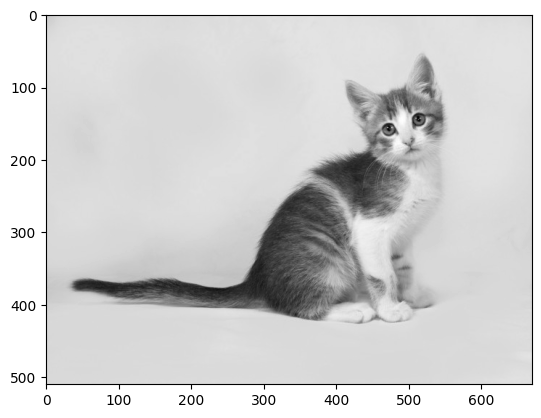

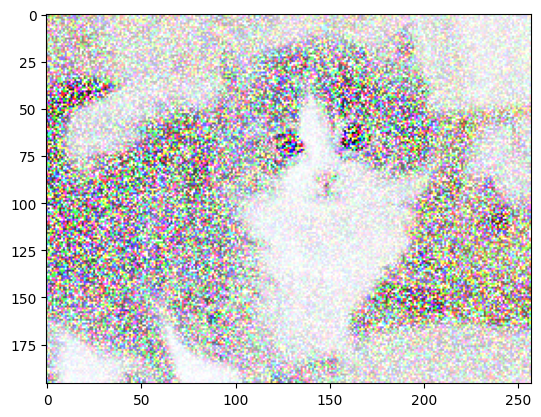

In [36]:
img = cv2.imread('./cat02/4_cat.png', cv2.IMREAD_GRAYSCALE)   # 이미지 로드
h, w = img.shape   # 이미지의 높이, 너비 구하기

mean = 0   # 평균
var = 100  # 분산 (노이즈의 크기)
sigma = var ** 0.5   # 표준편차

# 노이즈 생성
gaussian = np.random.normal(mean, sigma, (h, w))
gaussian = gaussian.reshape(h, w)
noisy_image = img + gaussian.astype(np.uint8)

# 원본 이미지
plt.imshow(img, 'gray')
plt.show()

# 난수 노이즈 생성 이미지
plt.imshow(noisy_img, 'gray')
plt.show()

## 채도(Saturation)

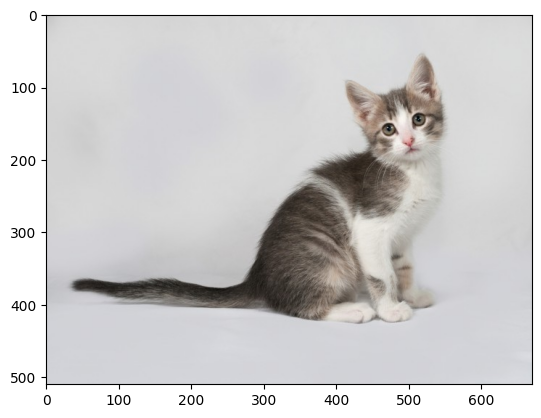

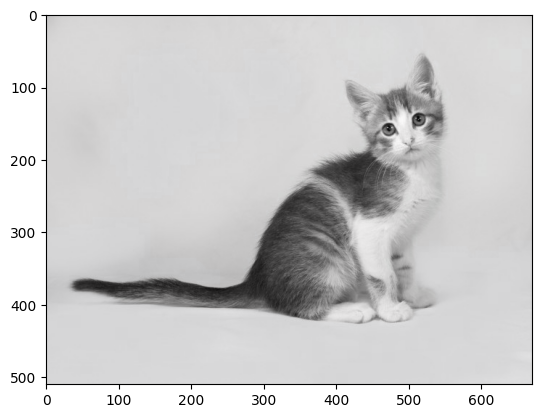

In [39]:
img = cv2.imread('./cat02/4_cat.png')
org_img = img.copy()
org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 채도 값을 1.5배로 증가시키기
saturation_factor = 1.5
img_hsv[:, :, 1] = img_hsv[:, :, 1] =saturation_factor

img_saturated = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# BRG -> RGB
img_saturated = cv2.cvtColor(img_saturated, cv2.COLOR_BGR2RGB)

# 원본 이미지
plt.imshow(org_img)
plt.show()
           
# 채도 조절 생성 이미지
plt.imshow(img_saturated)
plt.show()

## 광도(Brightness)

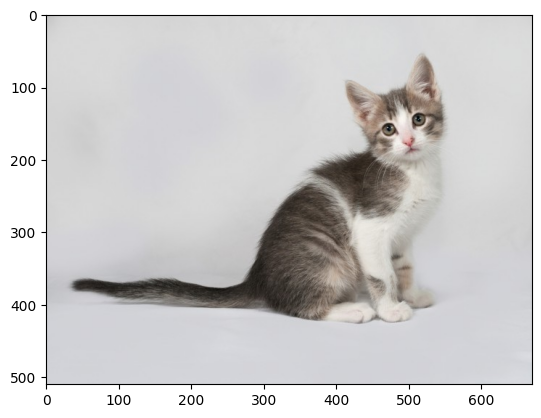

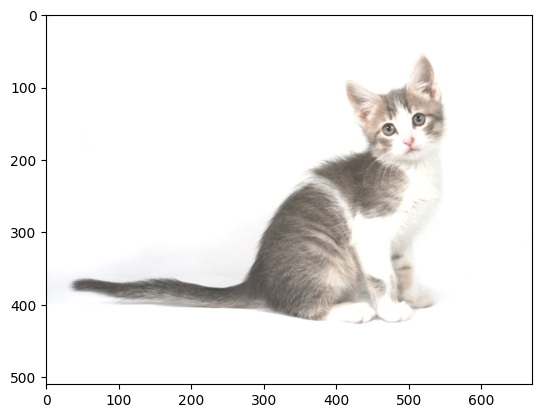

In [40]:
img = cv2.imread('./cat02/4_cat.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 광도 값을 50만큼 증가시키기
brightness_offset = 50
img_brightened = cv2.convertScaleAbs(img, alpha = 1, beta=brightness_offset)

# 원본 이미지
plt.imshow(img)
plt.show()

# 광도 생성 이미지
plt.imshow(img_brightened)
plt.show()

## 노이즈 제거

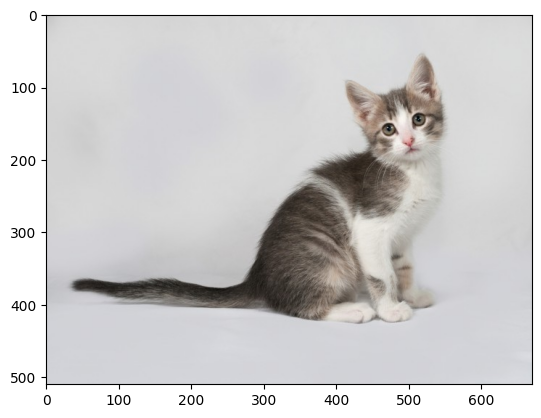

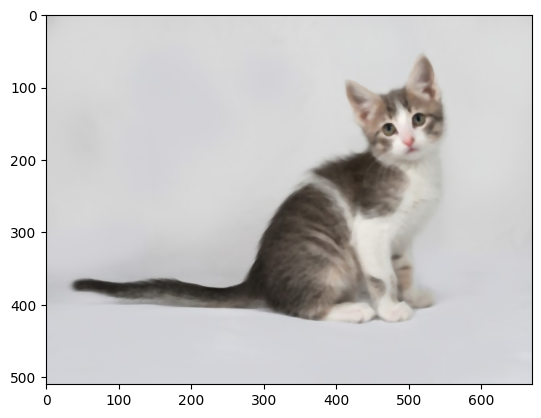

In [42]:
img = cv2.imread('./cat02/4_cat.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_filtered = cv2.medianBlur(img, 5)

# 원본 이미지
plt.imshow(img)
plt.show()

# 노이즈 제거 중간값 필터적용 임지ㅣ
plt.imshow(img_filtered)
plt.show()

## 히스토그램 균일화(Histogram equalization)

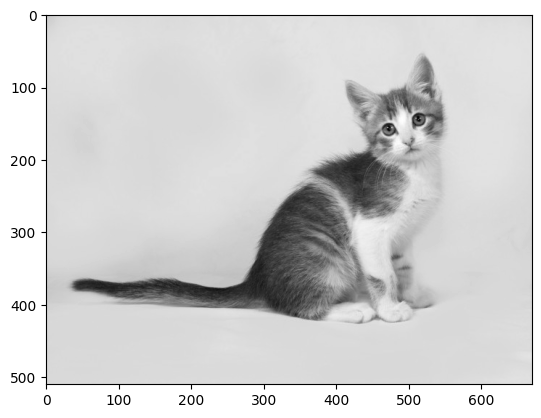

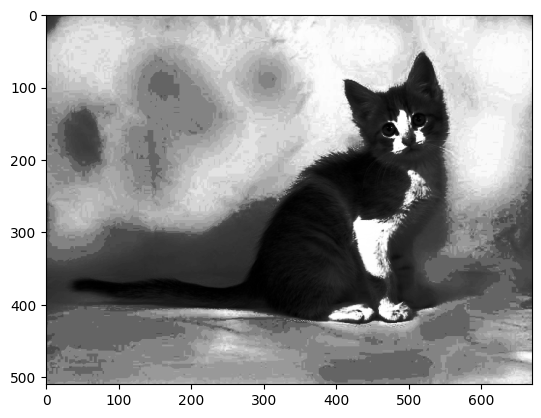

In [49]:
# 히스토그램 균일화 적용
img = cv2.imread('./cat02/4_cat.png', 0)

# cv2.equalizeHist() 함수가 8비트 단일 채널 이미지를 입력 -> 그레이 이미지 사용
img_equalized = cv2.equalizeHist(img)

# 원본 이미지
plt.imshow(img, 'gray')
plt.show()

# 히스토그램 균일화 생성 이미지
plt.imshow(img_equalized, 'gray')
plt.show()

## 가우시안 노이즈

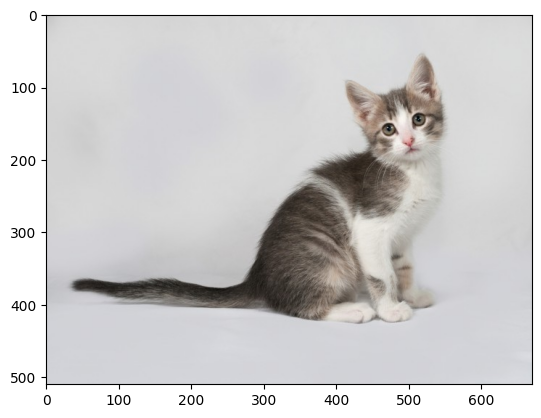

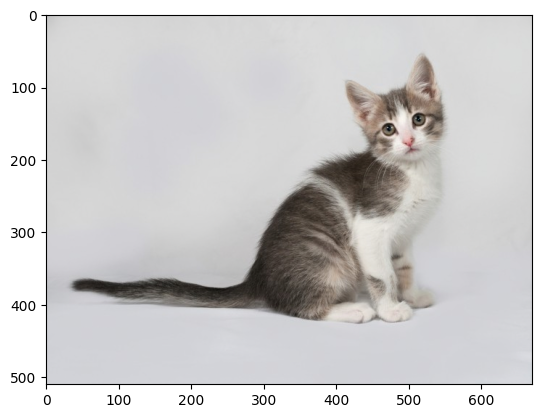

In [51]:
img = cv2.imread('./cat02/4_cat.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 가우시안 노이즈 생성
mean = 0
var = 0.1
sigma = var ** 0.5
gaussian_noise = np.random.normal(mean, sigma, img.shape)

# 노이즈 추가
img_noisy = img + gaussian_noise

# 원본 이미지 보기
plt.imshow(img)
plt.show()

# Noise 추가된 이미지 출력
plt.imshow(np.uint8(np.clip(img_noisy, 0, 255)))
plt.show()